# [Top 50 matplotlib Visualizations – The Master Plots](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)

**setup**

Run this once before the plot’s code. The individual charts, however, may redefine its own aesthetics.

In [1]:
#install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings;warnings.filterwarnings('ignore')

In [2]:
arge = 22; med = 16; small = 12

params = {'axes.titlesize': large,    # 设置子图上的标题字体
            'legend.fontsize': med,     # 设置图例的字体
            'figure.figsize': (16, 10), # 设置图像的画布
           'axes.labelsize': med,      # 设置标签的字体
            'xtick.labelsize': med,     # 设置x轴上的标尺的字体
            'ytick.labelsize': med,     # 设置整个画布的标题字体
          'figure.titlesize': large}  
#plt.rcParams.update(params)           # 更新默认属性
plt.style.use('seaborn-whitegrid')    # 设定整体风格
sns.set_style("white")                # 设定整体背景风格
%matplotlib inline

# Version
print(mpl.__version__)
print(sns.__version__) 

NameError: name 'large' is not defined

## Corralation

The plots under correlation is used to visualize the relationship between 2 or more variables. That is, how does one variable change with respect to another.

### Scatter Plot

Scatteplot is a classic and fundamental plot used to study the relationship between two variables. If you have multiple groups in your data you may want to visualise each group in a different color. In `matplotlib`, you can conveniently do this using `plt.scatterplot()`

In [ ]:
#Import dataset
midwest = pd.read_csv('../data/midwest_filter.csv')
midwest.head()

In [ ]:


#Prepare Data
#Create as many as there are unique midwest['Category']

categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

#Draw Plot for Each Category
plt.figure(figsize = (16,10),dpi = 80,facecolor='w',edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area','poptotal',
               data=midwest.loc[midwest.category==category,:],
               s=20,c=np.array(colors[i]).reshape(1,-1),label=str(category))

#Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')
plt.xticks(fontsize=12);plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=12)
plt.show()

Notes: `colors[i] warning,use c=np.array(colors[i]).reshape(1,-1)`

### Bubble plot with Encircling

Sometimes you want to show a group of points within a boundary to emphasize their importance. In this example, you get the records from the dataframe that should be encircled and pass it to the `encircle()` described in the code below.

For the `def encircle(x,y,an=None,**kw):`,check the question:[How do I encircle different data sets in scatter plot?](https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot)

In [ ]:
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
sns.set_style("white")

# Step 1: Prepare Data
midwest = pd.read_csv('../data/midwest_filter.csv')

# As many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')    

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', 
                data=midwest.loc[midwest.category==category, :], 
                s='dot_size', c=np.array(colors[i]).reshape(1,-1), 
                
       ##colors[i] warning,use c=np.array(colors[i]).reshape(1,-1)
                
                label=str(category), edgecolors='black', linewidths=.5)

    
# Step 3: Encircling 

## https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot

def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Select data to be encircled
midwest_encircle_data = midwest.loc[midwest.state=='IN', :]                         

# Draw polygon surrounding vertices    
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)

# Step 4: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)    
plt.show()    

### Scatter plot with linear regression line of best fit

If you want to understand how two variables change with respect to each other, the line of best fit is the way to go.

The below plot shows how the line of best fit differs amongst various groups in the data. 

To disable the groupings and to just draw one line-of-best-fit for the entire dataset, remove the `hue='cyl'` parameter from the `sns.lmplot()` call below.


In [ ]:
#Import Data
df = pd.read_csv('../data/mpg.csv')
df.head(-10)

In [ ]:
df_select = df.loc[df.cyl.isin([4,8]), :]
df_select.head(-10)

In [ ]:
#Plot
sns.set_style("white")
grid_obj= sns.lmplot(x="displ",y="hwy",hue="cyl",data=df_select,
                   height=7,aspect=1.6,robust=True,palette='tab10',
                   scatter_kws=dict(s=60,linewidths=0.7,edgecolors='black'))

#Decorations
grid_obj.set(xlim=(0.5,7.5),ylim=(0.,50))
plt.title("Scatterplot with line of best fit grouped by number of cylinders",fontsize=20)
plt.show()

#### Each regression line in its own column

Alternately, you can show the best fit line for each group in its own column. 

You can do this by setting the `col=groupingcolumn` parameter inside the `sns.lmplot()`.

In [ ]:
#Import Data (mpg_ggplot2)
# df = pd.read_csv('../data/mpg.csv')
# df.head(-10)
# df_select = df.loc[df.cyl.isin([4,8]), :]
df_select.head(-10)

In [ ]:
# Each line in its own column
sns.set_style("white")

grid_obj = sns.lmplot(x="displ",y="hwy",
                      data=df_select,
                      height=7,
                      robust=True,
                      palette='Set1',
                      col='cyl',
                      scatter_kws=dict(s=60,linewidths=0.7,edgecolors='black'))
# Decorations             
grid_obj.set(xlim=(0.5,7.5),ylim=(0,50))
plt.show()

### Jittering with stripplot

Often multiple datapoints have exactly the same X and Y values. 

As a result, multiple points get plotted over each other and hide. 

To avoid this, **jitter the points** slightly so you can visually see them. 

This is convenient to do using `seaborn’s stripplot()`.

In [ ]:
#Import data
# df.head()

#Draw Stripplot
_, ax = plt.subplots(figsize=(16,10),dpi=80)
sns.stripplot(df.cty,df.hwy,
              jitter=0.25,size=8,
             ax=ax,linewidth=0.5)

#Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)
plt.show()

### Count Plot

Another option to avoid the problem of points overlap is:

    the increase the size of the dot depending on how many points lie in that spot. 
    
 
So, larger the size of the point more is the concentration of points around that.

In [ ]:
#Import data mpg
# df.head()
# Prepare the data, filter the data we want:'hwy','cty'
df_counts = df.groupby(['hwy','cty']).size().reset_index(name='counts')
df_counts.head()

In [ ]:
# df_counts.cty

In [ ]:
# df_counts.hwy

In [ ]:
# df_counts.counts

In [ ]:
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')

# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df_counts.cty, df_counts.hwy,
              size=df_counts.counts*2,
              ax=ax, s=15)

# Decorations
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
plt.show()

##### ?help: where is the bigger and smaller circles?

this is the orignal plot:


<img src=https://www.machinelearningplus.com/wp-content/uploads/2018/11/5_Counts_plot_Matplotlib-min.png>

$\mathit{So\ what\ should\ I\ do,\ Ellie?~~~~~~~~~~~~(Up,2009)}$

In [ ]:
# # Import Data
# df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
# df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')

# # Draw Stripplot
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
# sns.stripplot(df_counts.cty, df_counts.hwy, size=df_counts.counts*2, ax=ax)

# # Decorations
# plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
# plt.show()

### Marginal Histogram

Marginal histograms have a histogram along the X and Y axis variables. 

This is used to visualize the relationship between the X and Y along with the univariate distribution of the X and the Y individually. 

This plot if often used in `exploratory data analysis (EDA)`.


In [ ]:
#Import Data
# df.head()

#Create Fig and gridspec
fig = plt.figure(figsize=(16,10),dpi=80)
grid = plt.GridSpec(4,4,hspace=0.5,wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy',
                s=df.cty*4, c=df.manufacturer.astype('category').cat.codes, 
                alpha=.7, data=df, cmap="tab10", 
                edgecolors='gray', linewidths=.5)

# Histogram on the right
ax_bottom.hist(df.displ, 50, histtype='stepfilled',
               orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis()

#Histogram in the bottom
ax_right.hist(df.hwy,40,histtype='stepfilled',
              orientation='horizontal',color='deeppink')
ax_bottom.invert_yaxis()

#Decorations

ax_main.set(title='Scatterplot with Histograms \n displ vs hwy',
            xlabel='displ',ylabel='hwy')
ax_main.title.set_fontsize(20)

for item in ([ax_main.xaxis.label,ax_main.yaxis.label]
             +ax_main.get_xticklabels()+ax_main.get_yticklabels()):
    item.set_fontsize(20)
    
xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()


### Marginal Boxplot

Marginal boxplot serves a similar purpose as marginal histogram. 

However, the boxplot helps to pinpoint the median, 25th and 75th percentiles of the X and the Y.

In [ ]:
# Import Data:mpg_ggplot2.csv
# df.head()

#Create Fig and Gridspec
fig = plt.figure(figsize=(16,10),dpi=80)
grid = plt.GridSpec(4,4,hspace=0.5,wspace=0.2)

# Define the axes
ax_main =fig.add_subplot(grid[:-1,:-1])
ax_right =fig.add_subplot(grid[:-1,-1],xticklabels=[],yticklabels=[])
ax_bottom =fig.add_subplot(grid[-1,0:-1],xticklabels=[],yticklabels=[])

# Scatterplot on the main ax
ax_main.scatter('displ','hwy',
               s=df.cty*5,c=df.manufacturer.astype('category').cat.codes,
               alpha=0.9,data=df,cmap="Set1",edgecolors='black',linewidths=0.5)

# Add a graph in each part
sns.boxplot(df.hwy, ax=ax_right, orient="v")
sns.boxplot(df.displ, ax=ax_bottom, orient="v")

# Decorations
# Remove x axis name for the boxplot
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

# Main Title,Xlabel and Ylabel
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy',
           xlabel='displ',ylabel='hwy')

# Set font size of different components
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label,ax_main.yaxis.label]
            +ax_main.get_xticklabels()+ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.show()

### Correllogram

Correlogram is used to visually see the correlation metric between all possible pairs of numeric variables in a given dataframe (or 2D array).

In [ ]:
# Correlogram of mtcars
# Import data mpg
df = pd.read_csv('../data/mtcars.csv')
# df.head()

# Plot
plt.figure(figsize=(12,10),dpi=80)
sns.heatmap(df.corr(),xticklabels=df.corr().columns,
            yticklabels=df.corr().columns,cmap="RdYlGn",
            center=0,annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Pairwise Plot

Pairwise plot is a favorite in exploratory analysis to understand the relationship between all possible pairs of numeric variables.

It is a **must have tool for bivariate analysis**.

In [ ]:
# Load dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8),dpi=80)
sns.pairplot(df, kind="scatter", hue="species", 
             plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [ ]:
plt.figure(figsize=(10,8),dpi=80)
sns.pairplot(df,kind='reg',hue='species')
plt.show()

Deviation
### Diverging Bars

If you want to see how the items are varying based on a single metric and visualize the order and amount of this variance, the diverging bars is a great tool. 

It helps to quickly differentiate the performance of groups in your data and is quite intuitive and instantly conveys the point.

In [ ]:
# Prepare Data mtcars
df = pd.read_csv('../data/mtcars.csv')
# df.head()
x = df.loc[:, ['mpg']]
# x.head()
df['mpg_z'] = (x - x.mean())/x.std()

# classify
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z',inplace=True)

df.reset_index(inplace=True)
df.head()

In [ ]:
# Draw plot
plt.figure(figsize=(14,10),dpi=80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z,colors=df.colors,
          alpha=0.4,linewidth=5)

# Decorations
plt.gca().set(ylabel='$Model$',xlabel='$Mileage$')
plt.yticks(df.index,df.cars,fontsize=16)
plt.title('Diverging Bars of Car Mileage',fontdict={'size':20})
plt.grid(linestyle='--',alpha=0.5)
# plt.show()

### Diverging Texts

Diverging texts is similar to diverging bars and it preferred if you want to show the value of each items within the chart in a nice and presentable way.

In [ ]:
# Prepare data mtcars
# df.head()
x = df.loc[:,['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()

df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]

df.sort_values('mpg_z',inplace=True)
df.reset_index(inplace=True)

# Draw Plot
plt.figure(figsize=(14,14),dpi=80)
plt.hlines(y=df.index, xmin=0,xmax=df.mpg_z)

for x,y,tex in zip(df.mpg_z,df.index,df.mpg_z):
    t = plt.text(x,y,round(tex,2),
                 horizontalalignment='right' if x <0 else 'left',
                 verticalalignment='center',
                 fontdict={'color':'red' if x <0 else 'green','size':14})
    
# Decorations
plt.yticks(df.index, df.cars,fontsize=12)
plt.title('Diverging Text Bars of Car Mileage',fontdict={'size':20})
plt.grid(linestyle='--',alpha=0.7)
plt.xlim(-2.5,2.5)
# plt.show()

### Diverging Dot Plot

Divering dot plot is also similar to the diverging bars.

However compared to diverging bars, the absence of bars reduces the amount of contrast and disparity between the groups.

In [ ]:
# Prepare Data mtcars
df = pd.read_csv('../data/mtcars.csv')
# df.head()
x = df.loc[:, ['mpg']]

df['mpg_z'] = (x-x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'darkgreen' for x in df['mpg_z']]
df.sort_values('mpg_z',inplace=True)
df.reset_index(inplace=True)

# Draw Plot
plt.figure(figsize=(14,16),dpi=80)
plt.scatter(df.mpg_z,df.index,s=450,alpha=0.6,color=df.colors)

for x,y,tex in zip(df.mpg_z,df.index,df.mpg_z):
    t = plt.text(x,y,round(tex,1),horizontalalignment= 'center',
                verticalalignment = 'center',fontdict={'color':'white'})
# you can run the code here.

# Decorations
# lighten borders

ax = plt.gca()
ax.spines["top"].set_alpha(0.3)
ax.spines["bottom"].set_alpha(0.6)
ax.spines["right"].set_alpha(0.1)
ax.spines["left"].set_alpha(0.3)

plt.yticks(df.index,df.cars)
plt.title('Diverging Dotplot of Car Mileage',fontdict={'size':20})
plt.xlabel('$Mileage$')
plt.grid(linestyle='--',alpha=0.5)
plt.xlim=(-2.5,2.5)
plt.show()

### Diverging Lollipop Chart with Markers

Lollipop with markers provides a flexible way of visualizing the divergence by laying emphasis on any significant datapoints you want to bring attention to and give reasoning within the chart appropriately.

In [ ]:
df.head()

NameError: name 'df' is not defined

In [ ]:
# Prepare Data mtcars
# df.head()
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = 'black'

# color fiat differently
df.loc[df.cars == 'Fiat X1-9', 'colors'] = 'darkorange'
df.sort_values('mpg_z', inplace=True)
# df.reset_index(inplace=True)


# Draw plot
import matplotlib.patches as patches

plt.figure(figsize=(14,16), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=1)
plt.scatter(df.mpg_z, df.index, color=df.colors, s=[600 if x == 'Fiat X1-9' else 300 for x in df.cars], alpha=0.6)
plt.yticks(df.index, df.cars)
plt.xticks(fontsize=12)

# Annotate
plt.annotate('Mercedes Models',xy=(0.0,11.0),xytext=(1.0,11),xycoords='data',
             fontsize=15,ha='center',va='center',
             bbox=dict(boxstyle='square',fc='firebrick'),
             arrowprops=dict(arrowstyle='-[, widthB=2.0, lengthB=1.5',
                             lw=2.0,color='steelblue'),color='white')


# Add Patches
p1 = patches.Rectangle((-2.0,-1),width=0.3,height=3,alpha=0.2,facecolor='red')
p2 = patches.Rectangle((1.5,27),width=0.8,height=5,alpha=0.2,facecolor='green')
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

# Decoration
plt.title('Diverging Bars of Car Mileage',fontdict={'size':20})
plt.grid(linestyle='--',alpha=0.5)

### Area Chart

By coloring the area between the axis and the lines, the area chart throws more emphasis not just on the peaks and troughs but also the duration of the highs and lows. The longer the duration of the highs, the larger is the area under the line.

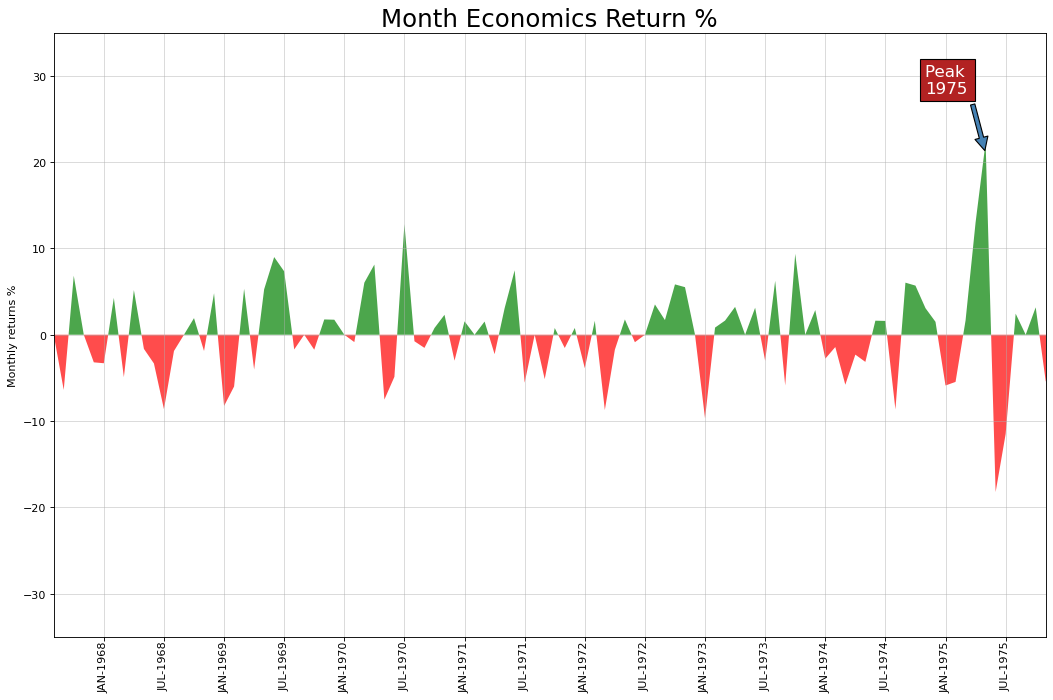

In [ ]:
# Prepare Data and np pd
df = pd.read_csv('../data/economics.csv')
# df.head()

x = np.arange(df.shape[0])  # 创造一个和数据相同长度的序列
y_returns = (df.psavert.diff().fillna(0)/df.psavert.shift(1)).fillna(0) * 100
# y_returns 获取所需要的数据


# Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.fill_between(x[1:], y_returns[1:], 0, 
                 where=y_returns[1:] >= 0, facecolor='green',
                 interpolate=True, alpha=0.7)
plt.fill_between(x[1:], y_returns[1:], 0, 
                 where=y_returns[1:] <= 0, facecolor='red',
                 interpolate=True, alpha=0.7)

# Annotate
plt.annotate('Peak \n1975', xy=(94.0, 21.0), xytext=(88.0, 28),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05), 
             fontsize=15, color='white')

# Date transfer
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()

# Decorations
xtickvals = [str(m)[:3].upper()+"-"+str(y) for y,m in zip(df.year,df.month)]

plt.gca().set_xticks(x[::6])
plt.gca().set_xticklabels(xtickvals[::6], rotation=90,
                          fontdict={'horizontalalignment': 'center', 
                                    'verticalalignment': 'center_baseline'})

plt.ylim(-35,35)
plt.xlim(1,100)
plt.title("Month Economics Return %", fontsize=22)
plt.ylabel('Monthly returns %')
plt.grid(alpha=0.5)

Sine the original date type is not feasible in the code, I handled the date in the code(date transfer)

Ranking

### Ordered Bar Chart

Ordered bar chart conveys the rank order of the items effectively. 

But adding the value of the metric above the chart, the user gets the precise information from the chart itself.

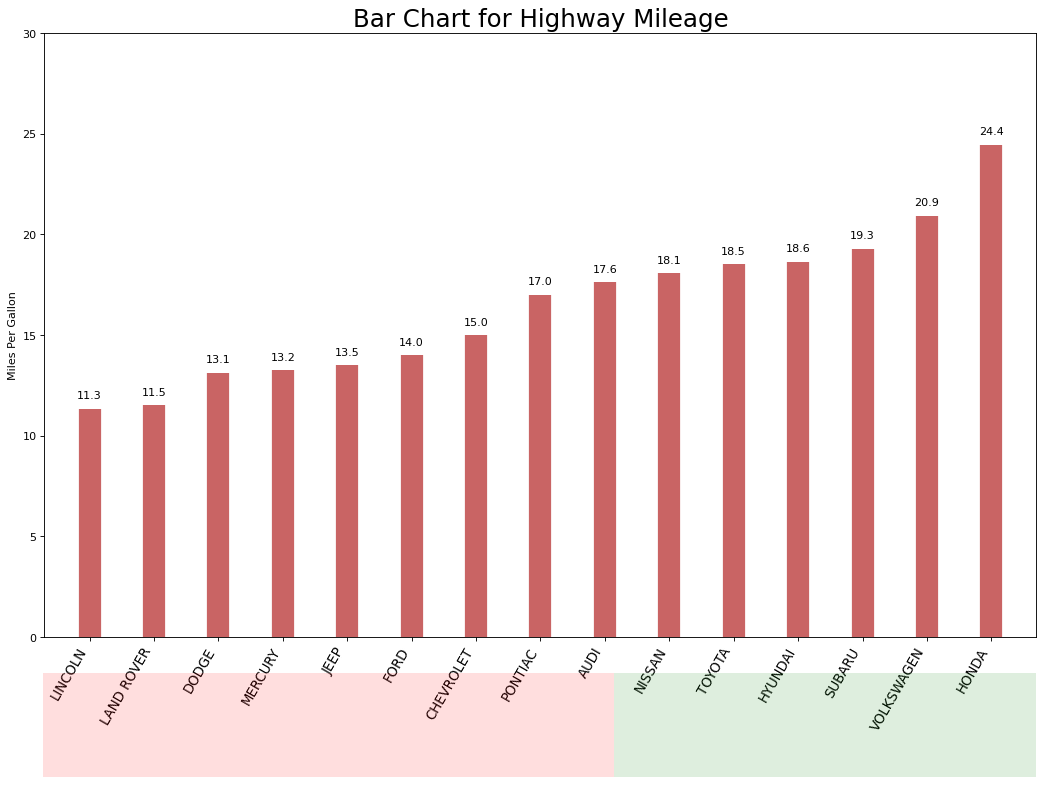

In [ ]:
# Prepare Data
df_raw = pd.read_csv('../data/mpg.csv')
# df_raw.head()
df = df_raw[['cty','manufacturer']].groupby('manufacturer').apply(lambda x:x.mean())
df.sort_values('cty',inplace=True)
df.reset_index(inplace=True)
# df.head()

# Draw Plot
import matplotlib.patches as patches

_, ax = plt.subplots(figsize=(16,10),facecolor='white',dpi=80)
ax.vlines(x=df.index,ymin=0,ymax=df.cty,color='firebrick',
         alpha=0.7,linewidth=20)

# Annotate Text
for i,cty in enumerate(df.cty):
    ax.text(i,cty+0.5,round(cty,1),horizontalalignment='center')
    
# Title,Label,Ticks,and Ylim
ax.set_title('Bar Chart for Highway Mileage',fontdict={'size':22})
ax.set(ylabel='Miles Per Gallon',ylim=(0,30))
plt.xticks(df.index,df.manufacturer.str.upper(),rotation=60,
          horizontalalignment='right',fontsize=12)

# Add Patches to color the X axis labels
p1 =patches.Rectangle((0.57,-0.05),
                      width=0.33,height=0.13,alpha=0.13,
                     facecolor='green',transform=_.transFigure)
p2 =patches.Rectangle((0.124,-0.05),
                      width=0.446,height=0.13,alpha=0.13,
                     facecolor='red',transform=_.transFigure)
_.add_artist(p1)
_.add_artist(p2)

### Lollipop Chart

Lollipop chart serves a similar purpose as a ordered bar chart in a visually pleasing way.

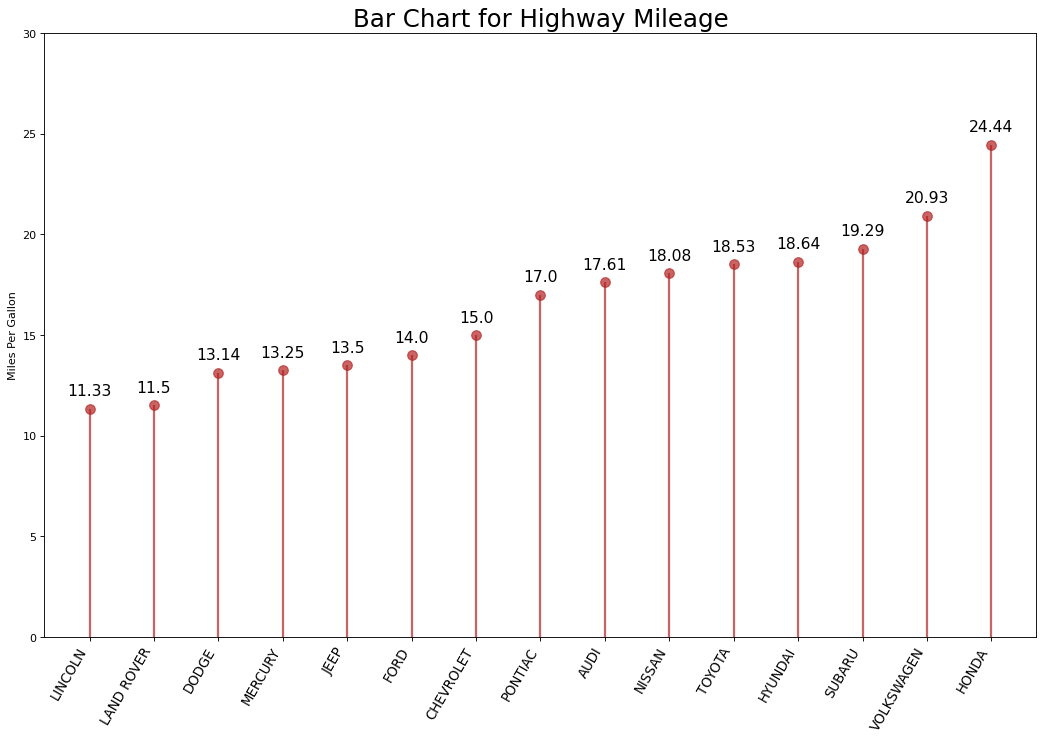

In [ ]:
# Prepare Data
# df_raw = pd.read_csv('../data/mpg.csv')
# # df_raw.head()
# df = df_raw[['cty','manufacturer']].groupby('manufacturer').apply(lambda x:x.mean())
# df.sort_values('cty',inplace=True)
# df.reset_index(inplace=True)
df.head()

# Draw Plot
_, ax = plt.subplots(figsize=(16,10),dpi=80)
ax.vlines(x=df.index,ymin=0,ymax=df.cty,color='firebrick',
         alpha=0.7,linewidth=2)
ax.scatter(x=df.index,y=df.cty,s=75,
          color='firebrick',alpha=0.7)

# Title,Label,Ticks,and Ylim
ax.set_title('Bar Chart for Highway Mileage',fontdict={'size':22})
ax.set(ylabel='Miles Per Gallon',ylim=(0,30))

ax.set_xticks(df.index)
ax.set_xticklabels(df.manufacturer.str.upper(),rotation=60,
                   fontdict={'horizontalalignment':'right','size':12})

# # Annotate
for row in df.itertuples():
    ax.text(row.Index, row.cty+.5, s=round(row.cty, 2), 
            horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

In [ ]:
# you should notice that:
df.itertuples

<bound method DataFrame.itertuples of    manufacturer        cty
0       lincoln  11.333333
1    land rover  11.500000
2         dodge  13.135135
3       mercury  13.250000
4          jeep  13.500000
5          ford  14.000000
6     chevrolet  15.000000
7       pontiac  17.000000
8          audi  17.611111
9        nissan  18.076923
10       toyota  18.529412
11      hyundai  18.642857
12       subaru  19.285714
13   volkswagen  20.925926
14        honda  24.444444>

In [ ]:
df.iteritems

<bound method DataFrame.iteritems of    manufacturer        cty
0       lincoln  11.333333
1    land rover  11.500000
2         dodge  13.135135
3       mercury  13.250000
4          jeep  13.500000
5          ford  14.000000
6     chevrolet  15.000000
7       pontiac  17.000000
8          audi  17.611111
9        nissan  18.076923
10       toyota  18.529412
11      hyundai  18.642857
12       subaru  19.285714
13   volkswagen  20.925926
14        honda  24.444444>

In [ ]:
df.iterrows

<bound method DataFrame.iterrows of    manufacturer        cty
0       lincoln  11.333333
1    land rover  11.500000
2         dodge  13.135135
3       mercury  13.250000
4          jeep  13.500000
5          ford  14.000000
6     chevrolet  15.000000
7       pontiac  17.000000
8          audi  17.611111
9        nissan  18.076923
10       toyota  18.529412
11      hyundai  18.642857
12       subaru  19.285714
13   volkswagen  20.925926
14        honda  24.444444>

### Dot Plot

The dot plot conveys the rank order of the items. 

And since it is aligned along the horizontal axis, you can visualize how far the points are from each other more easily.

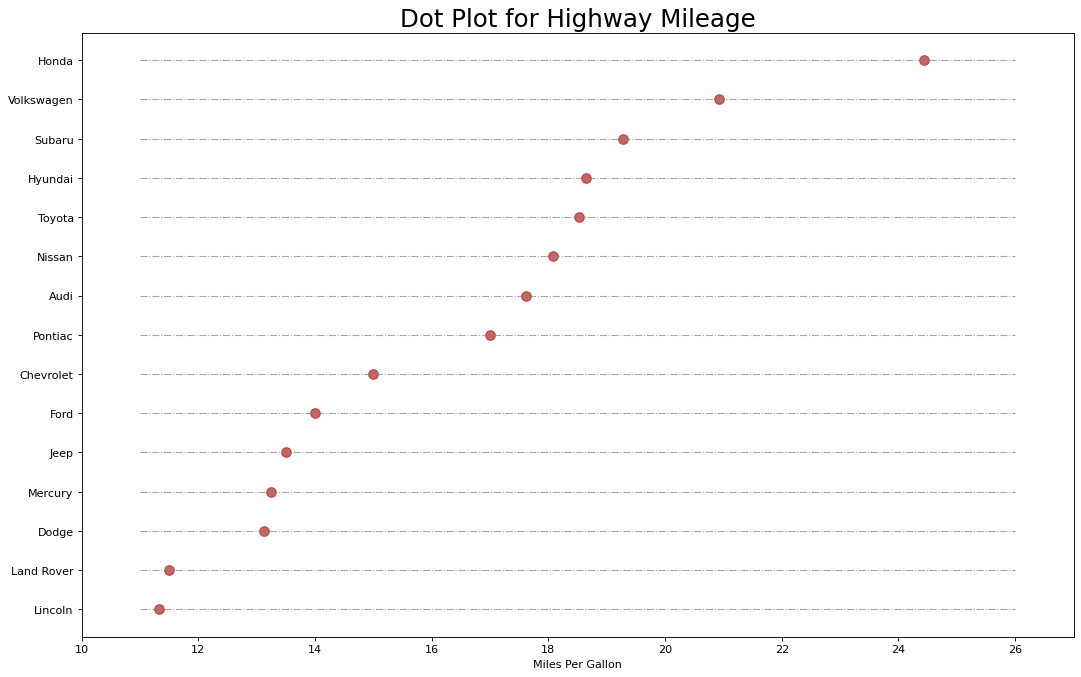

In [ ]:
# Prepare Data
# df_raw = pd.read_csv('../data/mpg.csv')
# # df_raw.head()
# df = df_raw[['cty','manufacturer']].groupby('manufacturer').apply(lambda x:x.mean())
# df.sort_values('cty',inplace=True)
# df.reset_index(inplace=True)

# Draw Plot
_, ax = plt.subplots(figsize=(16,10),dpi=80)
ax.hlines(y=df.index,xmin=11,xmax=26,color='grey',
         alpha=0.7,linewidth=1,linestyles='dashdot')

ax.scatter(y=df.index,x=df.cty,s=75,
          color='firebrick',alpha=0.7)

# Title,Label,Ticks,and Ylim
ax.set_title('Dot Plot for Highway Mileage',fontdict={'size':22})
ax.set(xlabel='Miles Per Gallon',xlim=(10,27))

ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(),
                   fontdict={'horizontalalignment':'right'})
plt.show()

### Slope Chart

Slope chart is most suitable for comparing the ‘Before’ and ‘After’ positions of a given person/item.

In [ ]:
import matplotlib.lines as mlines

# Import Data
df = pd.read_csv("../data/gdp_per_cap.csv")
# df.head()

left_label = [str(c) + ', ' + str(round(y)) for c, y in zip(df.continent,df['1952'])]
right_label = [str(c) + ', ' + str(round(y)) for c, y in zip(df.continent,df['1957'])] 
klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(df['1952'],df['1957'])]
# interesting definition : klass instead of "class",in case of the naming conflicts

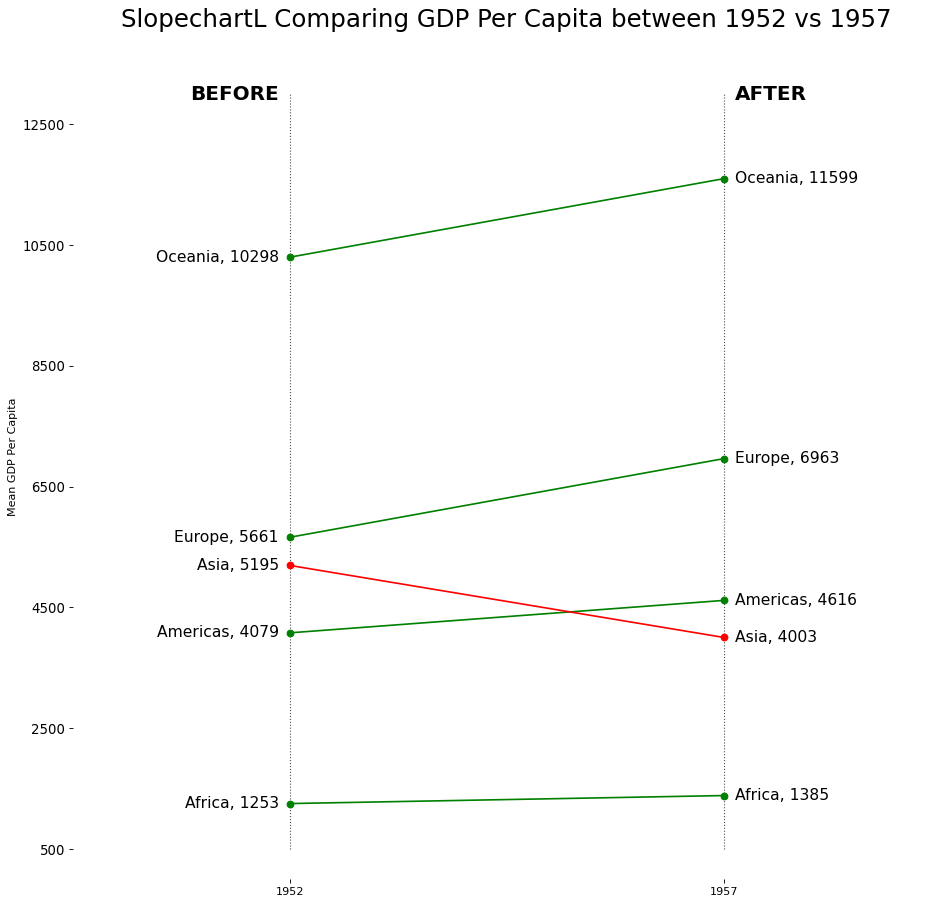

In [ ]:
# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1,p2,color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]],[p1[1],p2[1]],
                      color='red' if p1[1] - p2[1]>0 else 'green',
                     marker='o',markersize=6)
    ax.add_line(l)
    return l

_,ax = plt.subplots(1,1,figsize=(14,14),dpi=80)

# Vertical Lines(dotted both sides)
ax.vlines(x=1,ymin=500,ymax=13000,color='black',alpha=0.7,
          linewidth=1,linestyles='dotted')
ax.vlines(x=3,ymin=500,ymax=13000,color='black',alpha=0.7,
          linewidth=1,linestyles='dotted')


# Points
ax.scatter(y=df['1952'],x=np.repeat(1,df.shape[0]),
            s=10,color='black',alpha=0.7)
ax.scatter(y=df['1957'],x=np.repeat(3,df.shape[0]),
            s=10,color='black',alpha=0.7)

# Line Segmented Annotation

for p1,p2,c in zip(df['1952'],df['1957'],df['continent']):
    newline([1,p1],[3,p2])
    ax.text(1-0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', 
            verticalalignment='center', fontdict={'size':14})
    ax.text(3+0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left',
            verticalalignment='center', fontdict={'size':14})

# 'Before' and 'After' Annotations
ax.text(1-0.05, 13000,'BEFORE',horizontalalignment='right',
       verticalalignment='center',fontdict={'size':18,'weight':700})
ax.text(3+0.05, 13000,'AFTER',horizontalalignment='left',
       verticalalignment='center',fontdict={'size':18,'weight':700})

# Decoration
ax.set_title("SlopechartL Comparing GDP Per Capita between 1952 vs 1957",
             fontdict={'size':22})
ax.set(xlim=(0,4),ylim=(0,14000),ylabel='Mean GDP Per Capita')
ax.set_xticks([1,3])
ax.set_xticklabels(["1952","1957"])
plt.yticks(np.arange(500,13000,2000),fontsize=12)

# Lighten Borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
# plt.show()

### Dumbbell Plot

Dumbbell plot conveys the ‘before’ and ‘after’ positions of various items along with the rank ordering of the items. Its very useful if you want to visualize the effect of a particular project / initiative on different objects.

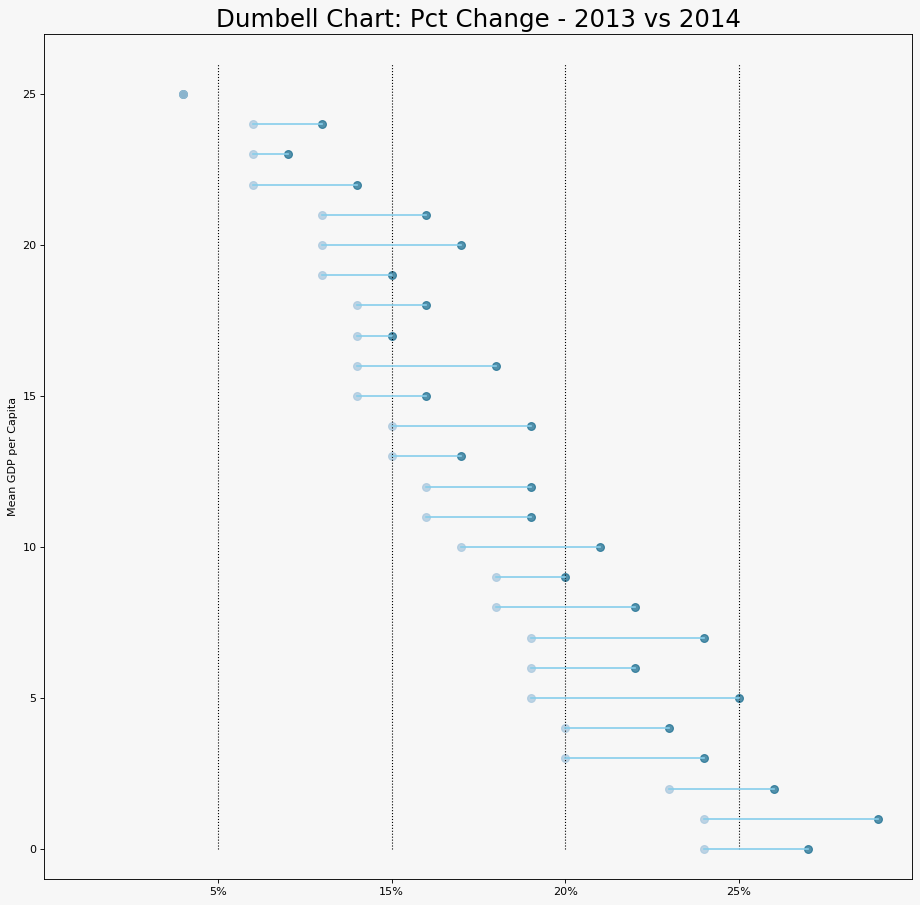

In [ ]:
import matplotlib.lines as mlines

# Import Data
df = pd.read_csv("../data/health.csv")
# df.head()
df.sort_values('pct_2014',inplace=True)
df.reset_index(inplace=True)
df.head()

# Func to draw line segment
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='skyblue')
    ax.add_line(l)
    return l

# Figure and Axes
_, ax = plt.subplots(1,1,figsize=(14,14),facecolor='#f7f7f7',dpi=80)

# Vertival Lines
ax.vlines(x = .05, ymin=0,ymax=26, color='black',
         alpha=1,linewidth=1,linestyles='dotted')
ax.vlines(x = .10, ymin=0,ymax=26, color='black',
         alpha=1,linewidth=1,linestyles='dotted')
ax.vlines(x = .15, ymin=0,ymax=26, color='black',
         alpha=1,linewidth=1,linestyles='dotted')
ax.vlines(x = .20, ymin=0,ymax=26, color='black',
         alpha=1,linewidth=1,linestyles='dotted')

# Points
ax.scatter(y=df['index'],x=df['pct_2013'],s=50,
          color='#0e668b',alpha=0.7)
ax.scatter(y=df['index'],x=df['pct_2014'],s=50,
          color='#a3c4dc',alpha=0.7)

# Line Segments (we need the newline def here)
for i, p1, p2 in zip(df['index'], df['pct_2013'],df['pct_2014']):
    newline([p1,i],[p2,i])

# Decoration
ax.set_facecolor('#f7f7f7')
ax.set_title('Dumbell Chart: Pct Change - 2013 vs 2014', fontdict={'size':22})
ax.set(xlim=(0,.25), ylim=(-1,27),ylabel="Mean GDP per Capita")
ax.set_xticks([.05,.10, .15,.20])
ax.set_xticklabels(['5%', '15%', '20%', '25%'])
plt.show()

Distribution

### Histogram for Continuous Variable

Histogram shows the frequency distribution of a given variable. 

The below representation groups the frequency bars based on a categorical variable giving a greater insight about the continuous variable and the categorical variable in tandem.


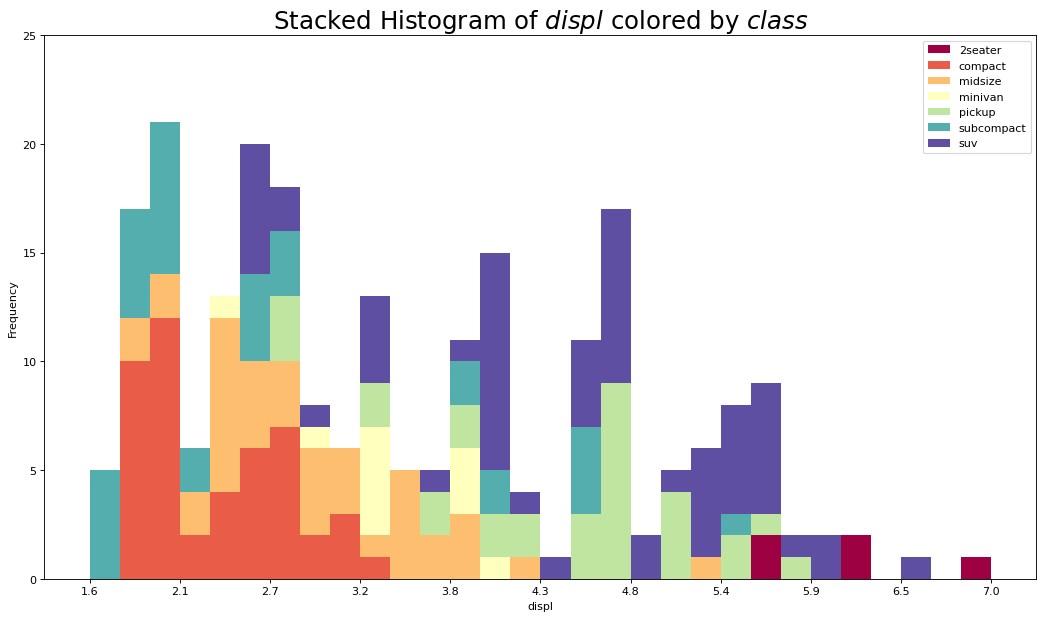

In [ ]:
# Import Data
df = pd.read_csv('../data/mpg.csv')
# df.head()

# Prepare Data
x_var ='displ'
groupby_var = 'class'
df_agg = df.loc[:,[x_var,groupby_var]].groupby(groupby_var)
# df_agg = df.loc[:,['displ','class']].groupby('class')
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9),dpi=80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
# compute the # of car brands
n, bins, patches = plt.hist(vals, 30, stacked=True,
                            density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(),
                                           colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$",
          fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0,25)
plt.xticks(ticks=bins[::3],labels=[round(b,1) for b in bins[::3]])
plt.show()

### Histogram for Categorical Variable

The histogram of a categorical variable shows the frequency distribution of a that variable. 

By coloring the bars, you can visualize the distribution in connection with another categorical variable representing the colors.

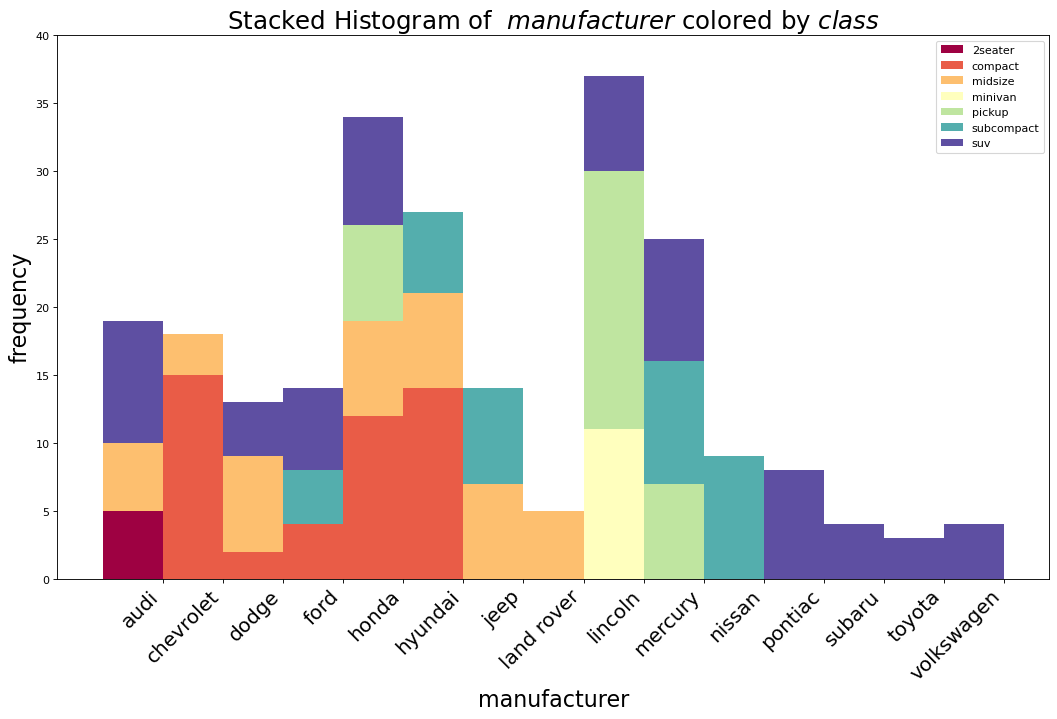

In [ ]:
# Import Data
df = pd.read_csv("../data/mpg.csv")
# df.head()

# Prepare Data
x_var = 'manufacturer'
groupby_var = 'class'
df_agg = df.loc[:,[x_var,groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i,df in df_agg]

# Draw
plt.figure(figsize=(16,9),dpi = 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df[x_var].unique().__len__(),
                           stacked=True,density=False,color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col 
            in zip(np.unique(df[groupby_var]).tolist(), 
                   colors[:len(vals)])})
plt.title(f"Stacked Histogram of  ${x_var}$ colored by ${groupby_var}$",
          fontsize=22)
plt.xlabel(x_var,fontsize=20)
plt.ylabel("frequency",fontsize=20)
plt.ylim(0,40)
plt.xticks(ticks=bins[1:],labels=np.unique(df[x_var]).tolist(),rotation=45,
           horizontalalignment='right',fontsize=18)
plt.show()

> Issue here ---> 26 plt.xticks(ticks=bins,labels=np.unique(df[x_var]).tolist(),rotation=45,
     27            horizontalalignment='right',fontsize=18)
     <br>
     So I modified here:**`ticks=bins[1:]`**

### Density Plot

Density plots are a commonly used tool visualise the distribution of a continuous variable.

By grouping them by the ‘response’ variable, you can inspect the relationship between the X and the Y. The below case if for representational purpose to describe how the distribution of city mileage varies with respect the number of cylinders.

mainly: `sns.kdeplot`


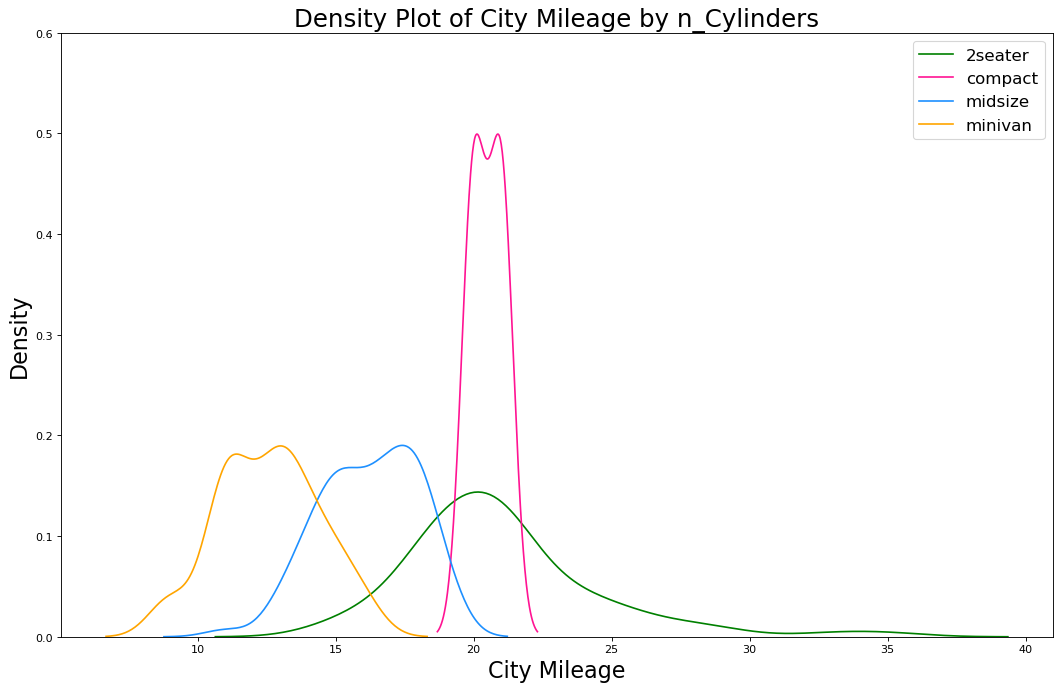

In [ ]:
# Import Data mpg
# df.head()

# Draw Plot
plt.figure(figsize=(16,10),dpi=80)
sns.kdeplot(df.loc[df['cyl'] == 4, "cty"], shade=False, 
            color="g", label="Cyl=4", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 5, "cty"], shade=False, 
            color="deeppink", label="Cyl=5", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 6, "cty"], shade=False, 
            color="dodgerblue", label="Cyl=6", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 8, "cty"], shade=False, 
            color="orange", label="Cyl=8", alpha=.7)

# Decoration
plt.legend({group:col for group, col 
            in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])},
          fontsize=15)
plt.title(f"Density Plot of City Mileage by n_Cylinders", fontsize=22)
plt.xlabel("City Mileage",fontsize=20)
plt.ylabel("Density",fontsize=20)
plt.ylim(0, 0.6)
plt.show()

### Density Curves with Histogram

Density curve with histogram brings together the collective information conveyed by the two plots so you can have them both in a single figure instead of two.

Classic one, try this:

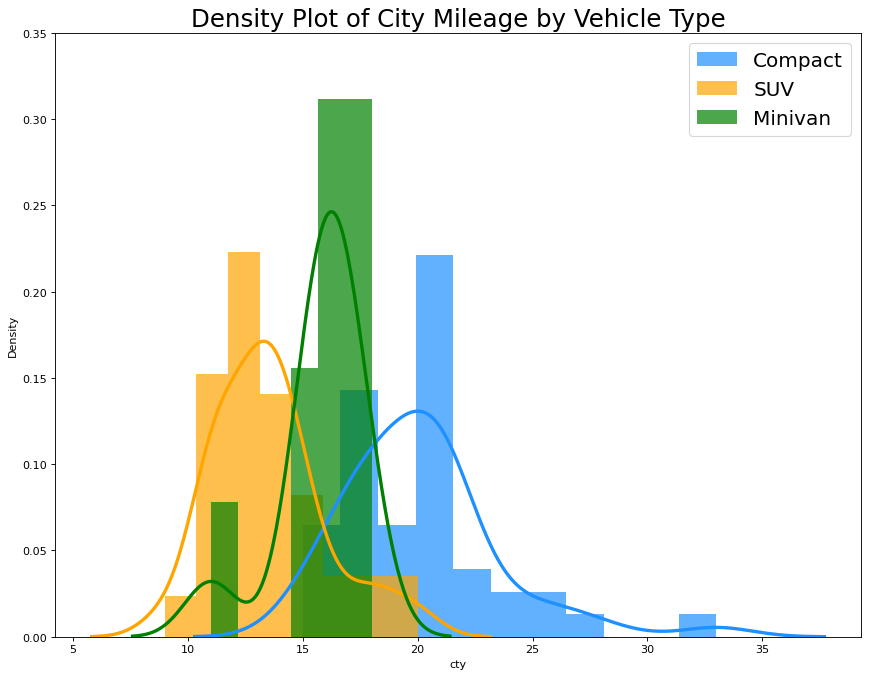

In [ ]:
# Import Data mpg
# df.head()

# Draw Plot
plt.figure(figsize=(13,10),dpi=80)
sns.distplot(df.loc[df['class'] == 'compact','cty'],
            color='dodgerblue',label="Compact",
             hist_kws={'alpha':.7},kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'suv','cty'],
            color='orange',label="SUV",
             hist_kws={'alpha':.7},kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'minivan','cty'],
            color='g',label="Minivan",
             hist_kws={'alpha':.7},kde_kws={'linewidth':3})
plt.ylim(0,0.35) # note the lim here, for the beauty

# Decoration
plt.title('Density Plot of City Mileage by Vehicle Type',fontsize=22)
plt.legend(fontsize=18)
plt.show()

### Joy Plot

Joy Plot allows the density curves of different groups to overlap, it is a great way to visualize the distribution of a larger number of groups in relation to each other. It looks pleasing to the eye and conveys just the right information clearly.

It can be easily built using the `joypy` package which is based on `matplotlib`.

<Figure size 1280x800 with 0 Axes>

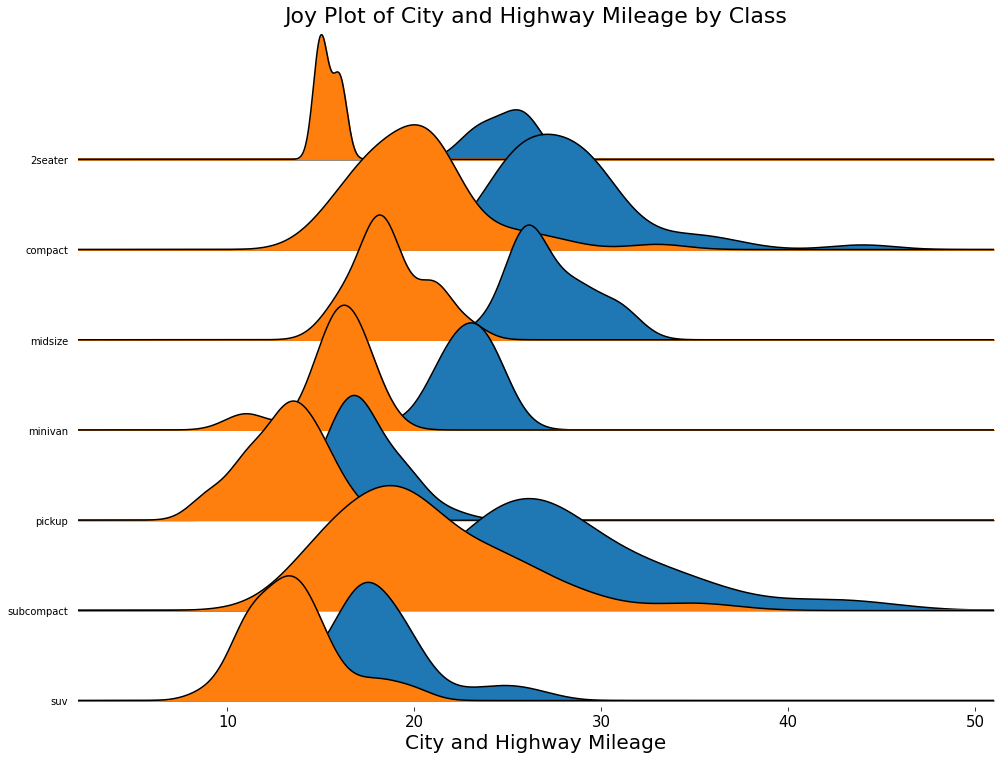

In [ ]:
# Import data and joypy
import joypy

mpg = pd.read_csv("../data/mpg.csv")
mpg.head()

# Draw Plot
plt.figure(figsize=(16,10),dpi=80)

_, axes = joypy.joyplot(mpg,column=['hwy','cty'],by='class',
                       ylim='own',figsize=(14,10))

# Decoration
plt.xticks(fontsize=15)
plt.xlabel('City and Highway Mileage',fontsize=20)
plt.title('Joy Plot of City and Highway Mileage by Class',fontsize=22)
plt.show()

### Distributed Dot Plot $?help$

Distributed dot plot shows the univariate distribution of points segmented by groups.

The darker the points, more is the concentration of data points in that region. 

By coloring the median differently, the real positioning of the groups becomes apparent instantly.

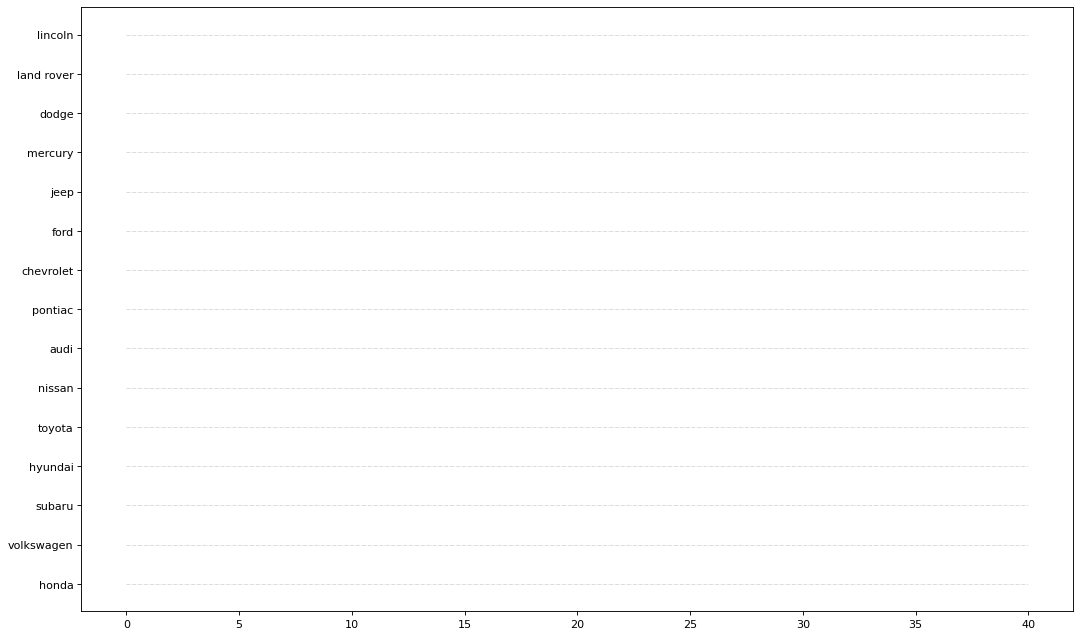

In [ ]:
# Import & prepare data,patches
import matplotlib.patches as mpatches

df_raw = pd.read_csv("../data/mpg.csv")
# def the colors by cylinders for the new column
cyl_colors = {4:'tab:red',5:'tab:green',6:'tab:blue',8:'tab:orange'}
# the new column cyl_color
df_raw['cyl_color'] = df_raw.cyl.map(cyl_colors) # deploy the colors by 'map'
# df_raw.head()

# Compute Mean and Median
## take care of each step
# df = df_raw[['cty','manufacturer']].groupby('manufacturer')
df = df_raw[['cty','manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())

## df = df_raw[['cty','manufacturer']].apply(lambda x: x.mean())
## here the lambda works on the cty 
## instead of manufacturer:could not convert string to float: 'audiaudiaudiaudiaudiaudiaudiaudiaudiaudiaudiaudiaudiaudiaudiaudiaudiaudichevroletchevroletchevroletchevroletchevroletchevroletc
## hevroletchevroletchevroletchevroletchevroletchevroletchevroletchevroletchev
df.sort_values('cty',ascending=False,inplace=True)
df_median = df_raw[['cty','manufacturer']].groupby('manufacturer').apply(lambda x: x.median())
# df_median.head()

# Draw horizontal lines
fig, ax = plt.subplots(figsize=(16, 10), dpi=80)
ax.hlines(y=df.index, xmin=0, xmax=40, color='gray',
          alpha=0.5, linewidth=.5, linestyles='dashdot')


In [ ]:

df.manufacturer

manufacturer
honda              honda
volkswagen    volkswagen
subaru            subaru
hyundai          hyundai
toyota            toyota
nissan            nissan
audi                audi
pontiac          pontiac
chevrolet      chevrolet
ford                ford
jeep                jeep
mercury          mercury
dodge              dodge
land rover    land rover
lincoln          lincoln
Name: manufacturer, dtype: object

In [ ]:
# import matplotlib.patches as mpatches

# # Prepare Data
# df_raw = pd.read_csv(
#     "https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
# cyl_colors = {4: 'tab:red', 5: 'tab:green', 6: 'tab:blue', 8: 'tab:orange'}
# df_raw['cyl_color'] = df_raw.cyl.map(cyl_colors)

# # Mean and Median city mileage by make
# df = df_raw[['cty', 'manufacturer']].groupby(
#     'manufacturer').apply(lambda x: x.mean())
# df.sort_values('cty', ascending=False, inplace=True)
# df.reset_index(inplace=True)
# df_median = df_raw[['cty', 'manufacturer']].groupby(
#     'manufacturer').apply(lambda x: x.median())

# # Draw horizontal lines
# fig, ax = plt.subplots(figsize=(16, 10), dpi=80)
# ax.hlines(y=df.index, xmin=0, xmax=40, color='gray',
#           alpha=0.5, linewidth=.5, linestyles='dashdot')

# # Draw the Dots
# for i, make in enumerate(df.manufacturer):
#     df_make = df_raw.loc[df_raw.manufacturer == make, :]
#     ax.scatter(y=np.repeat(i, df_make.shape[0]), x='cty',
#                data=df_make, s=75, edgecolors='gray', c='w', alpha=0.5)
#     ax.scatter(
#         y=i, x='cty', data=df_median.loc[df_median.index == make, :], s=75, c='firebrick')

# # Annotate
# ax.text(33, 13, "$red \; dots \; are \; the \: median$",
#         fontdict={'size': 12}, color='firebrick')

# # Decorations
# red_patch = plt.plot([], [], marker="o", ms=10, ls="",
#                      mec=None, color='firebrick', label="Median")
# plt.legend(handles=red_patch)
# ax.set_title('Distribution of City Mileage by Make', fontdict={'size': 22})
# ax.set_xlabel('Miles Per Gallon (City)', alpha=0.7)
# ax.set_yticks(df.index)
# ax.set_yticklabels(df.manufacturer.str.title(), fontdict={
#                    'horizontalalignment': 'right'}, alpha=0.7)
# ax.set_xlim(1, 40)
# plt.xticks(alpha=0.7)
# plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["bottom"].set_visible(False)
# plt.gca().spines["right"].set_visible(False)
# plt.gca().spines["left"].set_visible(False)
# plt.grid(axis='both', alpha=.4, linewidth=.1)
# plt.show()


### Box Plot

Box plots are a great way to visualize the distribution, keeping the median, 25th 75th quartiles and the outliers in mind.

However, you need to be careful about interpreting the size the boxes which can potentially distort the number of points contained within that group. So, manually providing the number of observations in each box can help overcome this drawback.


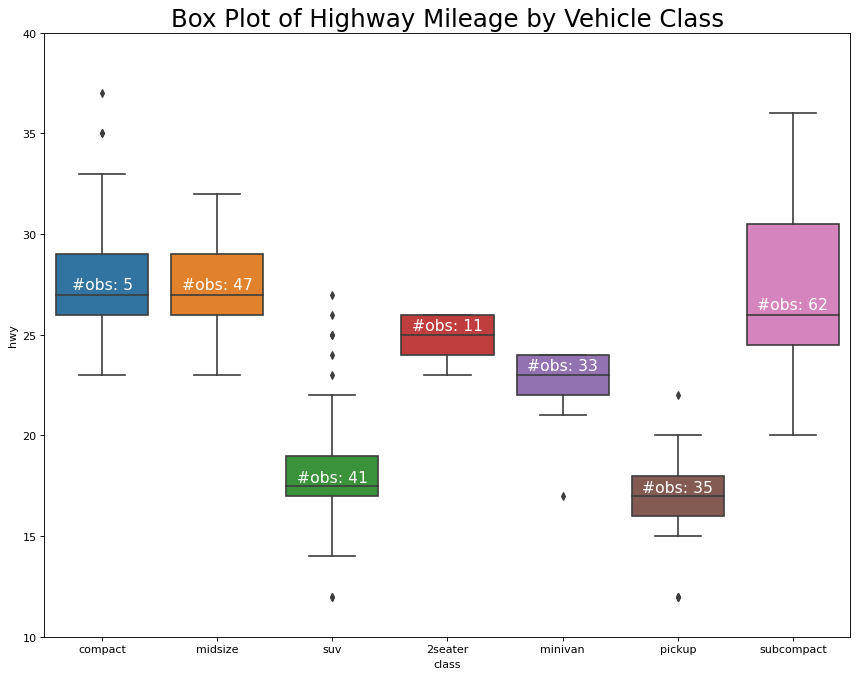

In [ ]:
# Import Data
df = pd.read_csv('../data/mpg.csv')
# df.head()

# Draw plots
plt.figure(figsize=(13,10),dpi = 80)
sns.boxplot(x = 'class', y = 'hwy',data = df,notch=False)

# Add N Obs inside boxplot

def add_n_obs(df, group_col, y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values
    for (x,xticklabel) , n_ob in zip(enumerate(xticklabels),n_obs):
        plt.text(x, medians_dict[xticklabel]*1.01, '#obs: ' + str(n_ob),
        horizontalalignment='center',fontdict={'size':14},color='white')

add_n_obs(df,group_col='class',y='hwy')

# Decoration
plt.title('Box Plot of Highway Mileage by Vehicle Class',fontsize=22)
plt.ylim(10,40)
plt.show()

### Dot + Box Plot

Dot + Box plot Conveys similar information as a boxplot split in groups. The dots, in addition, gives a sense of how many data points lie within each group.


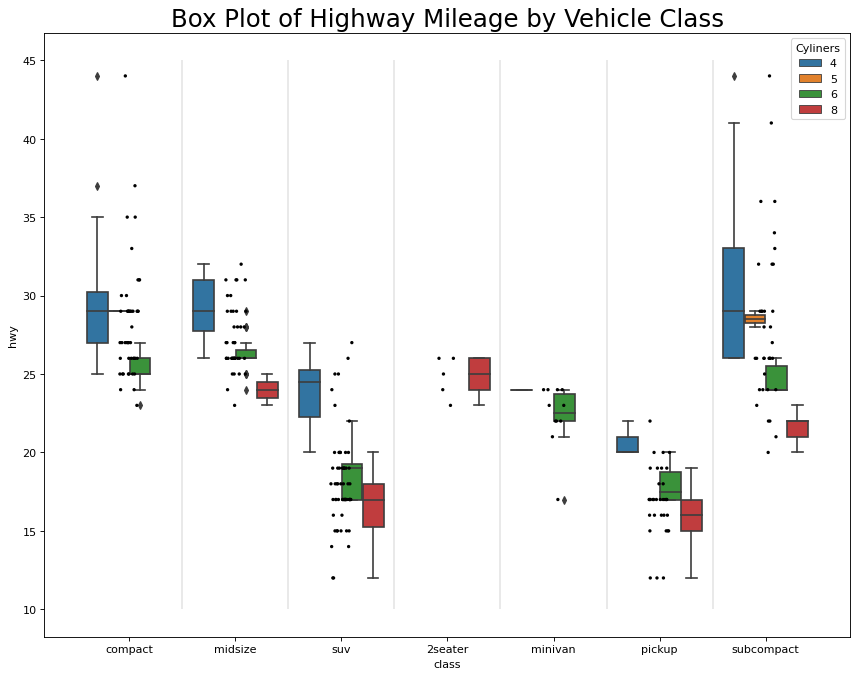

In [ ]:
# Import Data mpg
# df.head()

# Draw Plot

plt.figure(figsize=(13, 10), dpi=80)
sns.boxplot(x='class', y='hwy', data=df, hue='cyl')
sns.stripplot(x='class', y='hwy', data=df, color='black', size=3, jitter=1)

for i in range(len(df['class'].unique())-1):
    plt.vlines(i + .5 ,10 ,45,linestyle='solid',colors='gray',alpha=0.2)

# Decoration

plt.title('Box Plot of Highway Mileage by Vehicle Class',fontsize=22)
plt.legend(title='Cyliners')
plt.show()

### Violin Plot

Violin plot is a visually pleasing alternative to box plots. The shape or area of the violin depends on the number of observations it holds. However, the violin plots can be harder to read and it not commonly used in professional settings.



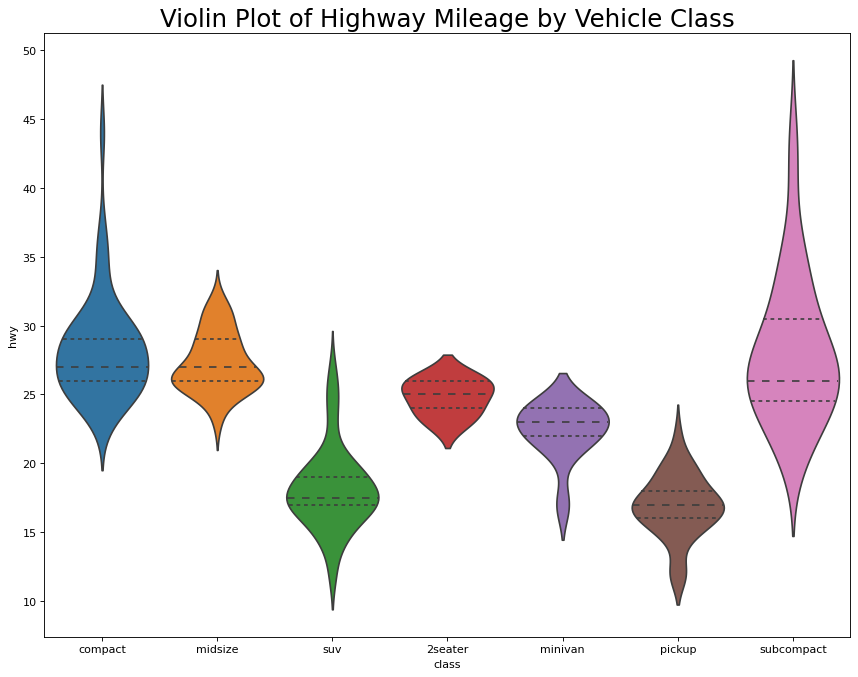

In [ ]:
# Import Data
# df.head()

# Draw Plot

plt.figure(figsize=(13, 10),dpi = 80)
sns.violinplot(x='class',y='hwy',data=df,scale='width',inner='quartile')

# Decoration
plt.title('Violin Plot of Highway Mileage by Vehicle Class',fontsize=22)
plt.show()


### Population Pyramid

Population pyramid can be used to show either the distribution of the groups ordered by the volumne. Or it can also be used to show the stage-by-stage filtering of the population as it is used below to show how many people pass through each stage of a marketing funnel.


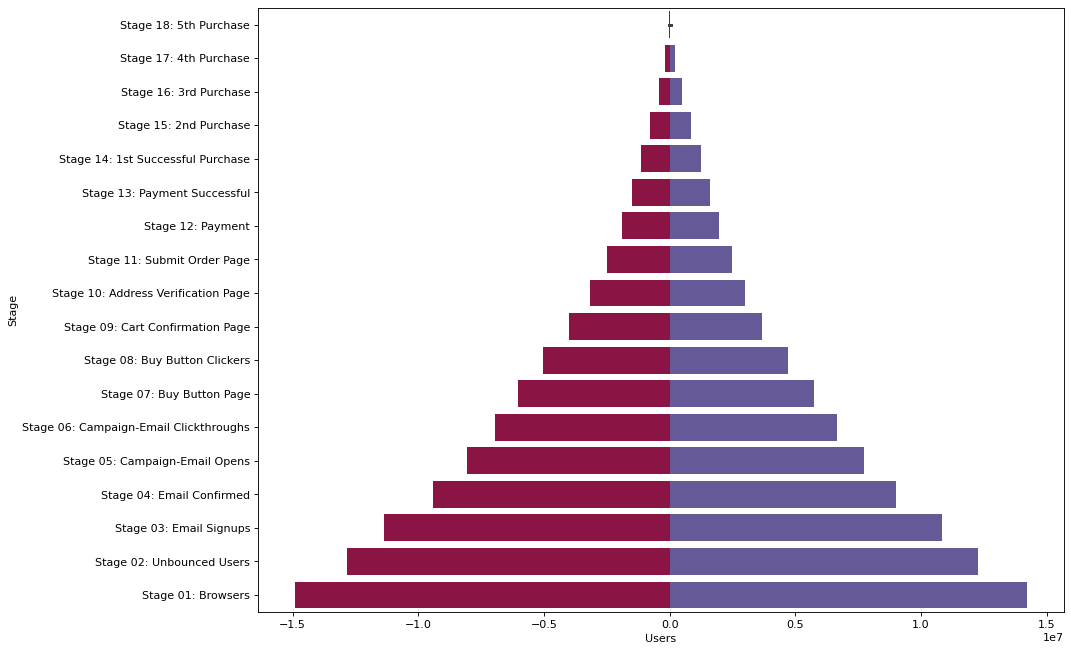

In [ ]:
# Read Data

df = pd.read_csv('../data/email_campaign_funnel.csv')
# df.head()

# Draw Plot
plt.figure(figsize=(13, 10), dpi=80)
group_col = 'Gender'
order_of_bars = df.Stage.unique()[::-1]
colors = [plt.cm.Spectral(i/float(len(df[group_col].unique())-1))
          for i in range(len(df[group_col].unique()))]

for c, group in zip(colors, df[group_col].unique()):
    sns.barplot(x='Users', y='Stage', data=df.loc[df[group_col] == group, :], 
    order=order_of_bars, color=c, label=group)

# Decorations
plt.xlabel("$Users$")
plt.ylabel("Stage of Purchase")
plt.yticks(fontsize=12)
plt.title("Population Pyramid of the Marketing Funnel", fontsize=22)
plt.legend()
plt.show()


### Categorical Plots

Categorical plots provided by the seaborn library can be used to visualize the counts distribution of 2 ore more categorical variables in relation to each other.
(by Titanic datasets)


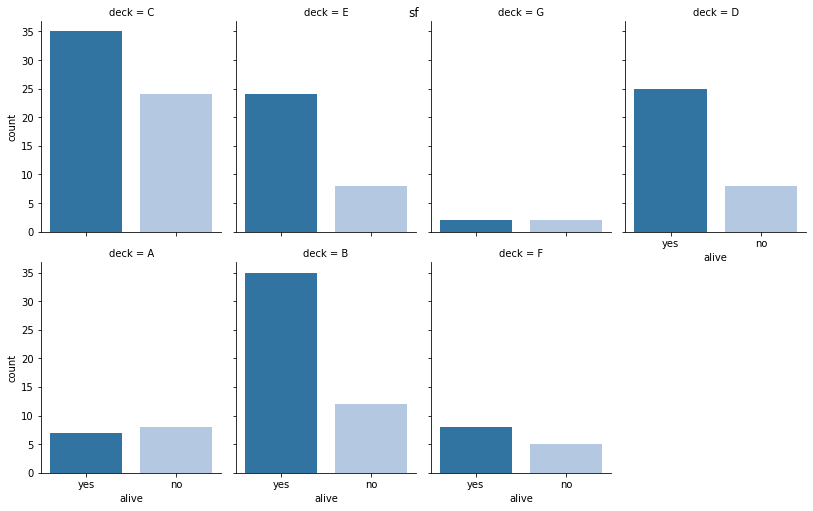

In [14]:
# Load dataset 
# titanic = sns.load_dataset("titanic") # failed 
titanic = pd.read_csv('../data/titanic.csv')
# titanic.head()

# Plot
g = sns.catplot('alive', col='deck', col_wrap=4,
data=titanic[titanic.deck.notnull()],kind='count',height=3.5,aspect=.8,palette='tab20')

plt.suptitle('sf')
plt.show()

####  Categorical Plots with the violin plot

Stil with the sns.catplot, kind='violin'


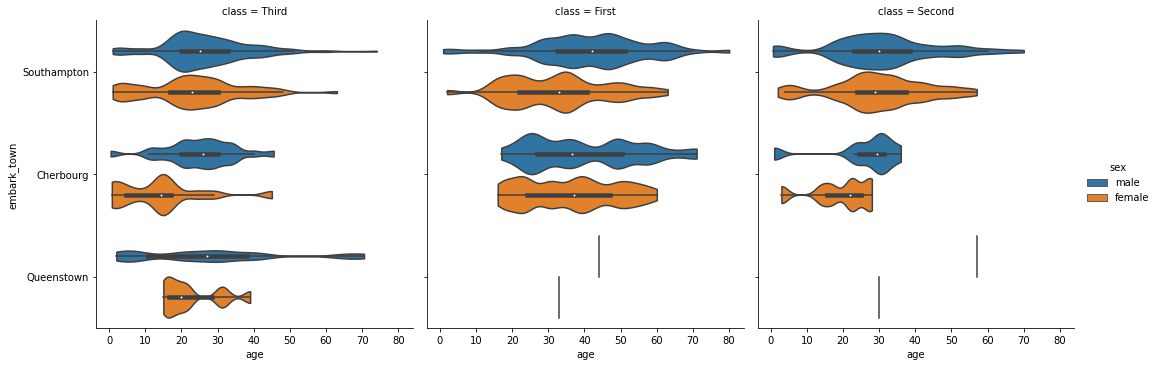

In [21]:
# titanic.head()
# Plot
sns.catplot(x="age", y="embark_town",
            hue="sex", col="class",
            data=titanic[titanic.embark_town.notnull()],
            orient="h", height=5, aspect=1, palette="tab10",
            kind="violin", dodge=True, cut=0, bw=.2)


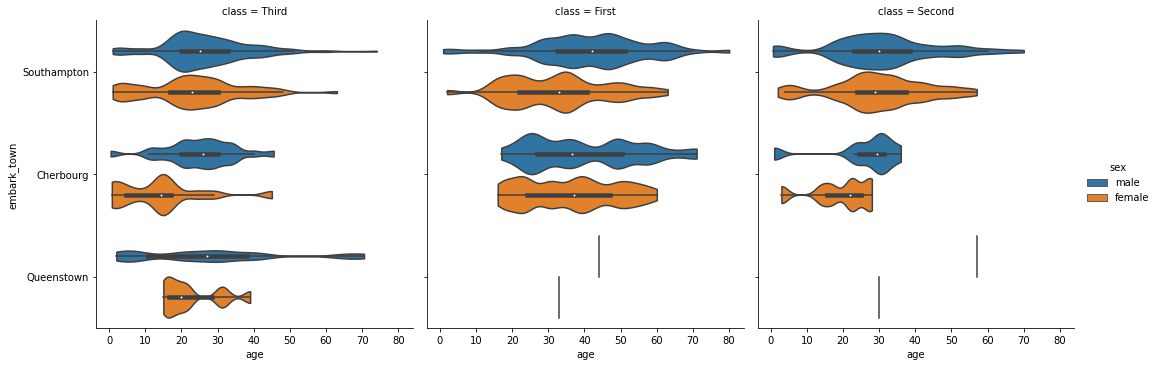

In [20]:
sns.catplot(x="age", y="embark_town",
            hue="sex", col="class",
            data=titanic[titanic.embark_town.notnull()],
            orient="h", height=5, aspect=1, palette="tab10",
            kind="violin", dodge=True, cut=0, bw=.2)


### Waffle Chart

[Heavy code](https://stackoverflow.com/questions/41400136/how-to-do-waffle-charts-in-python-square-piechart)

The `waffle` chart can be created using the `pywaffle` package and is used to show the compositions of groups in a larger population.


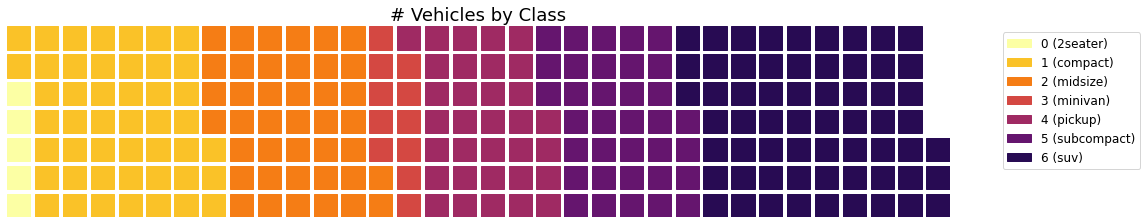

In [27]:
from pywaffle import Waffle

# Import Data
df_raw =pd.read_csv('../data/mpg.csv')

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')
n_categories =df.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

# Draw Plot Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '111': {
            'values': df['counts'],
            'labels': ["{0} ({1})".format(n[0], n[1]) for n in df[['class', 'counts']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': '# Vehicles by Class', 'loc': 'center', 'fontsize': 18}
        },
    },
    rows=7,
    colors=colors,
    figsize=(16, 9)
)

In [28]:
# Another mpg not example not showed here. 

### Pie Chart

Pie chart is a classic way to show the composition of groups.

However, its not generally advisable to use nowadays because the area of the pie portions can sometimes become misleading. 

So, if you are to use pie chart, its highly recommended to explicitly write down the percentage or numbers for each portion of the pie.


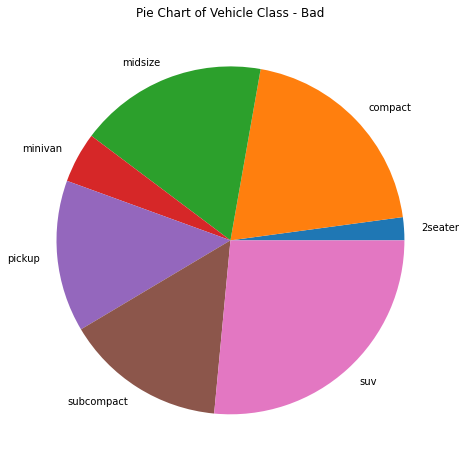

In [45]:
# Import Data mpg
# df_raw.head()


# Prepare Data
df = df_raw.groupby('class').size()
# try without size

# Make the plot with pandas
df.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Pie Chart of Vehicle Class - Bad")
plt.ylabel("")
plt.show()


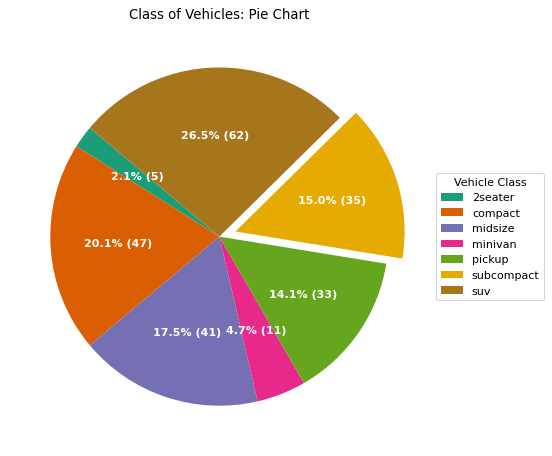

In [56]:
# Class of Vehicles: Pie Chart"
# Import Data mpg
# df_raw.head()

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')

# Draw Plot 
_, ax = plt.subplots(figsize=(12,7),subplot_kw=dict(aspect="equal"),dpi=80)

data = df['counts']
categories = df['class']
explode = [0, 0, 0, 0, 0, 0.1, 0]

def func(pct, allvals):
    absolute = int(pct/100. * np.sum(allvals))
    return "{:.1f}% ({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                                             autopct=lambda pct: func(pct, data),
                                                            textprops=dict(color='w'),colors=plt.cm.Dark2.colors,
                                                            startangle=140,explode=explode)

# Decotation
ax.legend(wedges, categories, title="Vehicle Class",
          loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Class of Vehicles: Pie Chart")
plt.show()
